In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import preprocessing

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [5]:
train = pd.read_csv('train.csv', index_col=0)

In [9]:
train.head()

,subject_id,0,1,2,3,4,5,6,7,8,...,107810,107811,107812,107813,107814,107815,107816,107817,107818,target
599,32658,0.005328,0.0,0.004796,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
613,42327,0.001727,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
312,17735,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
964,27390,0.003818,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,43737,0.002810,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
test = pd.read_csv('test.csv', index_col=0)

In [39]:
# test.head()
test.shape

(468, 107821)

In [ ]:
X_train = train.drop('target', axis=1)
y_train = train['target']

X_test = test.drop('target', axis=1)
y_test = test['target']

In [37]:
models = [
          LogisticRegression(max_iter=1000, C=3),
          RandomForestClassifier(max_depth=15),
          KNeighborsClassifier(n_neighbors=3),
          SVC(),
         ]

In [42]:
accuracies = []
# predictions = []
sensitivities = []
specificities = []

for model in models:
    print('Testing ' + str(model))
    # _ = model.fit(X_train, y_train)

    acc = cross_val_score(model, X_test, y_test, cv=5)

    # pred = model.predict(X_test)
    sensitivity = make_scorer(recall_score)
    specificity = make_scorer(recall_score, pos_label=0)

    sens = cross_val_score(model, X_test, y_test, cv=5, scoring=sensitivity)
    spec = cross_val_score(model, X_test, y_test, cv=5, scoring=specificity)

    accuracies.append(acc)
    # predictions.append(pred)
    sensitivities.append(sens)
    specificities.append(spec)


Testing LogisticRegression(C=3, max_iter=1000)
Testing RandomForestClassifier(max_depth=15)
Testing KNeighborsClassifier(n_neighbors=3)
Testing SVC()


In [43]:
accuracies

[array([0.5106383 , 0.5       , 0.55319149, 0.50537634, 0.50537634]),
 array([0.85106383, 0.81914894, 0.77659574, 0.83870968, 0.83870968]),
 array([0.59574468, 0.58510638, 0.56382979, 0.60215054, 0.65591398]),
 array([0.56382979, 0.58510638, 0.54255319, 0.55913978, 0.64516129])]

In [44]:
sensitivities

[array([0.        , 0.        , 0.82978723, 0.        , 0.        ]),
 array([0.86956522, 0.82978723, 0.76595745, 0.84782609, 0.82608696]),
 array([0.58695652, 0.70212766, 0.61702128, 0.52173913, 0.63043478]),
 array([0.84782609, 0.72340426, 0.82978723, 0.7173913 , 0.89130435])]

In [45]:
specificities

[array([1.        , 1.        , 0.27659574, 1.        , 1.        ]),
 array([0.83333333, 0.80851064, 0.85106383, 0.87234043, 0.85106383]),
 array([0.60416667, 0.46808511, 0.5106383 , 0.68085106, 0.68085106]),
 array([0.29166667, 0.44680851, 0.25531915, 0.40425532, 0.40425532])]

In [50]:
# train['target'].value_counts()

In [51]:
# test['target'].value_counts()

In [59]:
mean_acc = [i.mean() for i in accuracies]
mean_sens = [i.mean() for i in sensitivities]
mean_spec = [i.mean() for i in specificities]

In [73]:
comp = pd.DataFrame({'Mean CV Accuracy': mean_acc,
'Mean CV Sensitivity': mean_sens,
'Mean CV Specificity': mean_spec}, index=['Logistic Regression', 'Random Forest', 'KNN', 'SVM']
)

In [80]:
comp.round(4)

,Mean CV Accuracy,Mean CV Sensitivity,Mean CV Specificity
Logistic Regression,0.5149,0.1660,0.8553
Random Forest,0.8248,0.8278,0.8433
KNN,0.6005,0.6117,0.5889
SVM,0.5792,0.8019,0.3605


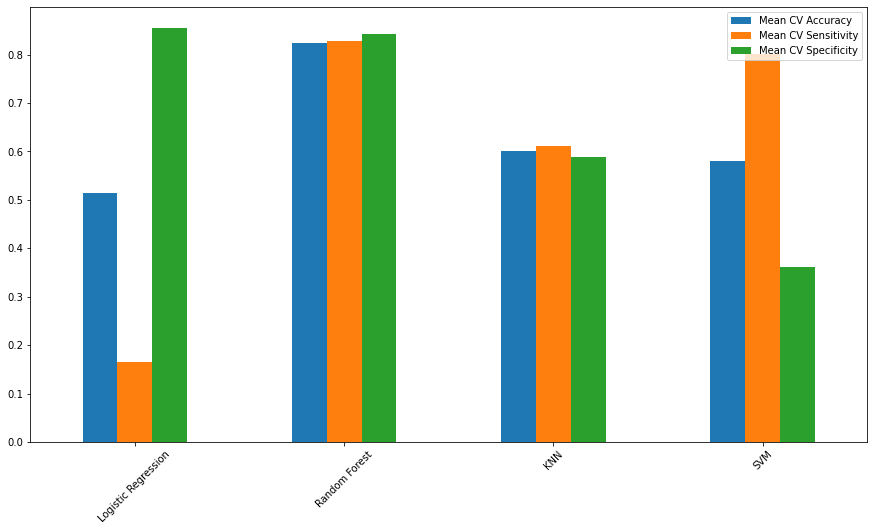

In [78]:
# plt.figure()
comp.plot.bar(figsize=(15,8))
plt.xticks(rotation = 45)
plt.savefig('model_comp', bbox_inches = 'tight')
plt.show()